In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

np.random.seed(42)

# Simulating media variables with positive impact
media1 = np.random.normal(100, 20, 100)
media2 = np.random.normal(200, 30, 100)
media3 = np.random.normal(150, 25, 100)

# Simulating random variables with no impact
random1 = np.random.normal(0, 1, 100)
random2 = np.random.normal(0, 1, 100)
random3 = np.random.normal(0, 1, 100)

# Simulating highly correlated media variables
media4 = media1 * 1.5 + np.random.normal(0, 5, 100)

# Simulating negative variables like price
price = np.random.normal(10, 0.5, 100)

# Simulating distribution
distribution = np.random.normal(500, 100, 100)

# Creating a DataFrame
data = pd.DataFrame({
    'media1': media1,
    'media2': media2,
    'media3': media3,
    'random1': random1,
    'random2': random2,
    'random3': random3,
    'media4': media4,
    'price': price,
    'distribution': distribution,
})

# Simulating sales based on the variables
true_coefficients = np.array([0.5, 0.3, 0.2, 0, 0, 0, -1, 0.2])
X = data[['media1', 'media2', 'media3', 'random1', 'random2', 'media4', 'price', 'distribution']]
sales = X.values @ true_coefficients + np.random.normal(0, 4, 100)
data['sales'] = sales

# Fit the linear regression model and check the R2 score
model = LinearRegression()
model.fit(X, sales)
predictions = model.predict(X)




# Simulate some MMM Data

I've simulated data with highly correlated media variables and variables which are random noise

In [2]:
data

,media1,media2,media3,random1,random2,random3,media4,price,distribution,sales
0,109.934283,157.538878,158.944684,-0.828995,-1.594428,0.926178,168.686368,9.738638,593.828381,244.519473
1,97.234714,187.380640,164.019613,-0.560181,-0.599375,1.909417,141.241244,10.524505,448.395527,215.216717
2,112.953771,189.718565,177.076281,0.747294,0.005244,-1.398568,173.778686,9.647828,509.612078,241.197278
3,130.460597,175.931682,176.345051,0.610370,0.046981,0.562969,202.469085,9.295769,453.772471,239.851346
4,95.316933,195.161429,115.558266,-0.020902,-0.450065,-0.650643,145.042573,9.221685,456.550377,212.171334
...,...,...,...,...,...,...,...,...,...,...
95,70.729701,211.559521,132.677260,-0.469176,0.538910,-0.510016,104.546819,10.526576,564.870989,226.691379
96,105.922406,173.484277,172.489997,-1.713135,-1.037246,-0.269875,160.514273,9.980222,483.288192,233.372647
97,105.221105,204.611753,157.682488,1.353872,-0.190339,-0.978764,151.576090,10.340750,514.671369,240.687471
98,100.102269,201.746262,170.321553,-0.114540,-0.875618,-0.444293,154.773539,10.014159,620.650897,256.470628


# Import the module and set your openai key

In [3]:
from autoMMM.automodeller import AutoModeller
import openai
openai.api_key = "your key here"


# Select independent & dependent variables and initial alpha for the ridge regression

In [14]:
# Select the initial independent variables
independent_vars = ['media1', 'media2']
# Set the dependent variable
dependent_var = 'sales'
# Set the initial alpha value for Ridge Regression
initial_alpha = 1.0


# Set the minimum and maximum number of iterations 
**(Warning, each iteration is a prompt request to openai, therefore incurs a cost)**

In [15]:
min_iterations = 1
max_iterations = 10


# Create an instance of the AutoModeller class & run the automodeller


In [16]:
automodeller = AutoModeller(data, dependent_var, independent_vars, initial_alpha, min_iterations, max_iterations)
# Run the automodeller
automodeller.run()


variable test counts
{'media1': 1, 'media2': 1, 'media3': 0, 'random1': 0, 'random2': 0, 'random3': 0, 'media4': 0, 'price': 0, 'distribution': 0, 'sales': 0}
variable test counts
{'media1': 2, 'media2': 2, 'media3': 1, 'random1': 0, 'random2': 0, 'random3': 0, 'media4': 1, 'price': 1, 'distribution': 1, 'sales': 0}
model count:
1
variable test counts
{'media1': 3, 'media2': 3, 'media3': 2, 'random1': 1, 'random2': 1, 'random3': 1, 'media4': 1, 'price': 2, 'distribution': 2, 'sales': 0}
model count:
2
variable test counts
{'media1': 4, 'media2': 4, 'media3': 3, 'random1': 1, 'random2': 1, 'random3': 1, 'media4': 2, 'price': 3, 'distribution': 3, 'sales': 0}
model count:
3
variable test counts
{'media1': 5, 'media2': 5, 'media3': 4, 'random1': 2, 'random2': 2, 'random3': 2, 'media4': 3, 'price': 4, 'distribution': 4, 'sales': 0}
model count:
4
variable test counts
{'media1': 6, 'media2': 6, 'media3': 5, 'random1': 2, 'random2': 3, 'random3': 3, 'media4': 4, 'price': 5, 'distribution': 5

# Plot the variable test counts
**Variable test counts give an indication of which variables the model has favoured


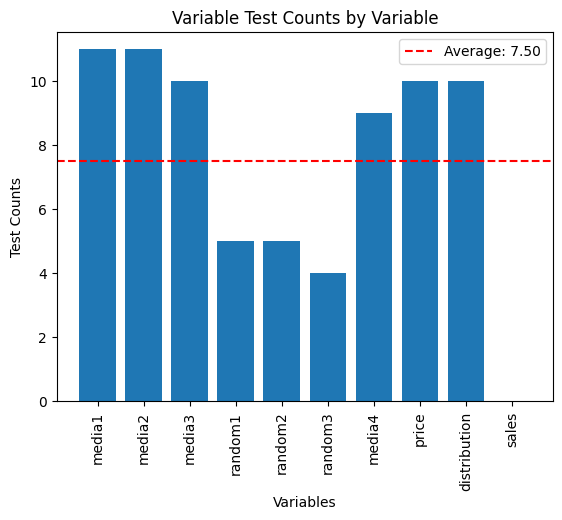

In [17]:
automodeller.plot_variable_test_counts()